<img width="800" height="500"  src="Resources/Project_Header.png">

### Simulating Data
Data is simulated for many different reasons, in the context of the simulation I will be completing into generating some data on child birth variables like gestation period, gender, birth weight etc. I will be coding the data in such a way that the number of lines generated by the code can be altered by entering an integer at the start of notebook.

From this data that has been generated programatically analysis can be coducted into the different variables and their relationships with each other. For example birth weights can be impacted by amongst other things the gender and the gestation period with higher gestation periods resulting in a larger birth weight.

Having this data available and simulating the data could also be used in predicting outcomes or in conducting what if analysis. Whereby based on the data predictions could be made on the health of the population for generations to come and possibly into the likelihood of developing diabetes. 

For example if a relationship was hypothesised between birth weight and the chances of developing diabetes for example, simulations could quickly be conducted with some additional related variables to help determine and prove this link.

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from [here.](https://www.quora.com/How-can-I-make-sure-the-user-inputs-a-positive-integer-in-Python)

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 850


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as discussed in (Ritchie & Roser, 2019). As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper relating to the data used in the website by (Ritchie & Roser, 2019) on gender ratios is based off of the study completed (Chao, et al., 2019) , for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

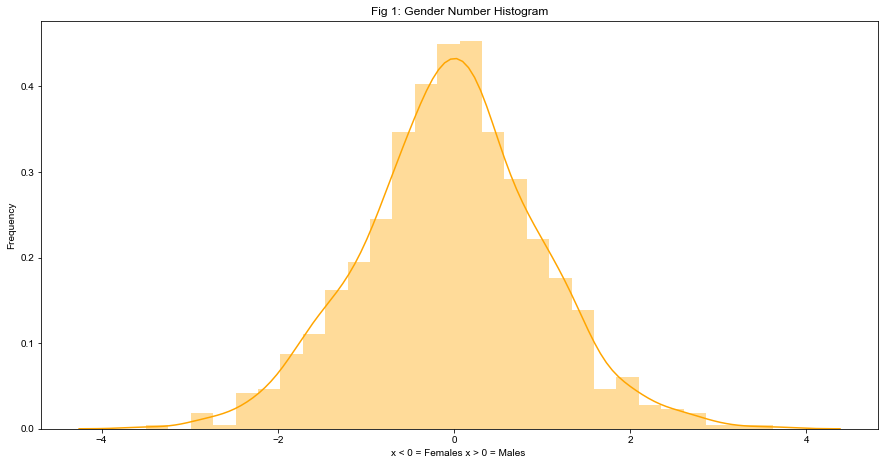

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange')
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('x < 0 = Females x > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0         0.594935        Male
1         0.848726        Male
2         0.030050        Male
3        -0.814542      Female
4        -1.839911      Female
5        -0.709453      Female
6         0.334597        Male
7         0.608845        Male
8         0.215774        Male
9        -1.753281      Female
10        1.040820        Male
11        0.182243        Male
12        1.426669        Male
13       -0.152786      Female
14        0.255854        Male
15        0.398777        Male
16       -0.259575      Female
17       -0.286768      Female
18       -0.591213      Female
19        0.709244        Male
20        0.897159        Male
21       -1.085914      Female
22        0.424048        Male
23        0.325791        Male
24        0.244610        Male
25       -0.075863      Female
26        1.867246        Male
27       -0.598476      Female
28        0.228344        Male
29       -0.102857      Female
..             ...         ...
820     

### Create Gestation Length Data

Gestation period plays a huge role in the birth weight that a child will be when it is born, (Jukic, et al., 2013) describes several start points for starting the counting of days of gestation. For my analysis I will be using the Last Menstrual Period (LMP) as my start point for measuring the number of days of gestation.

The mean and standard deviation required to generate the gestational data were taken from (Jukic, et al., 2013), the type of distribution that represents gestation period can be seen in (Nassar, et al., 2013). 

Figure 1 taken from (Nassar, et al., 2013) shows the curve of the gestation period over the years 1994-2009 for Australian births, the resulting curve for 2009 apppears to follow a standard normal distribution.


![Figure 1](Resources/Figure_1.png)
**Figure 1**




For my simulation I will generate data for gestational period in days that follows this kind of curve.

In [7]:
# Mean 285 Standar Deviation 14 as per Table I (Jukic, et al., 2013)
# Numbers divided by 7 in order to get number of weeks to be used in birth weight calculation

birth_data['gestation_period'] = np.random.normal(loc=285, scale=14, size=number_births)/7

# Round Gestation Period to nearest whole number
birth_data['gestation_period'] = birth_data['gestation_period'].round(0)

I spoke with a colleague in work on my project and gave her a look at what I was trying to simulate in my project, from this interaction she advised that generally labour is induced no later than 42 weeks into gestation.


After this chat I did some research and found that gestation in Ireland does not usually be allowed to go further than 42 weeks as discussed in (Association for Improvements in the Maternity Services - Ireland, 2014). On the website they discuss commencing the inducing of labour by week 40 in gestation.

As the above reference also mentions labours up to 42 weeks I believe it safe to assume that the gestation will not go over the 42 week mark, therefore I will reduce any of my values above 42 weeks to 42 weeks using the below code.

In [8]:
birth_data['gestation_period'] = np.where(birth_data['gestation_period']>42.0, np.random.randint(40, 42), birth_data['gestation_period'] )
#print(birth_data)

After creating the below plot I noticed that there seemed to be a bias towards 42 weeks gestation due to my initial code to update all gestation periods above 42 weeks to 42 weeks.

In order to make the data more evenly spread in changed the code that updated the gestation period to a random function that adjusted numbers greater than 42 to random integers between 40 and 42 inclusive in order to create what I feel to be a more real dataset.

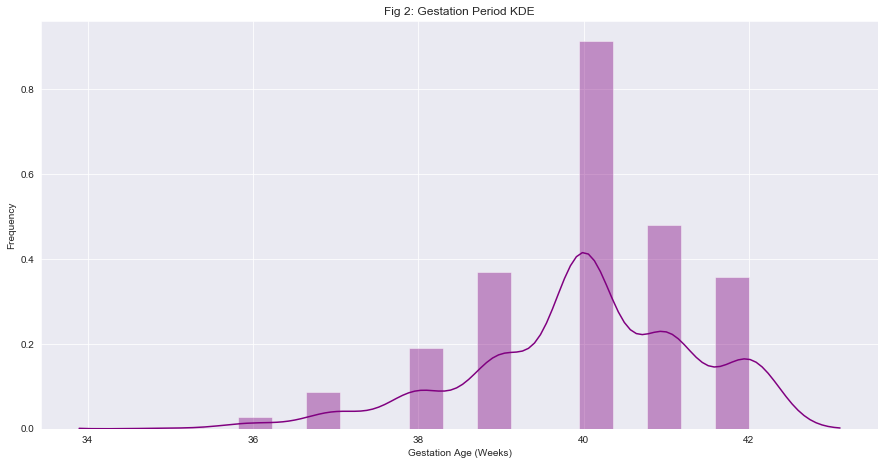

In [9]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(birth_data['gestation_period'], color='purple')
sbn.set_style("darkgrid")
plt.title('Fig 2: Gestation Period KDE')
plt.xlabel('Gestation Age (Weeks)')
plt.ylabel('Frequency')
plt.show()

### Create Weight Data

The study carried out in (Charnigo, et al., 2010) set out to model the distributions of birth weights in children. The author goes on to explain that different components of data can have an influence on the shape of the distributions such as smoking preference and ethnicity to name two.

For the purpose of this simulation as highlighted by the author of the above study I will be using a noraml distribution as there are far too many components to account for all instances but I will use a different mean for either genders and the gestation age in the generation of the data.

In there study (Janssen, et al., 2007) descibed the mean and standard deviations of birth weights broken out by gestation period and gender, table 1 is taken from this study. 

For generating my data I will be using the european baby data, for gestation periods in my simulated data above 41 weeks and below 37 weeks I will combine them with the closest week number I have data for.


**Table 1**
![Table_1](Resources/Table_1.png)

Code to create new column in datafram using apply function adapted from [here](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns).

In [10]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=3336.4, scale=434.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3359.4, scale=416.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3586.0, scale=460.3, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3687.6, scale=410.5, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3877.1, scale=384.4, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=3050.7, scale=414.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3293.5, scale=423.3, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3455.8, scale=434, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3639.5, scale=458.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3696.8, scale=448, size=None)
  else: return 0

birth_data['birth_weight'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_weight'] = birth_data['birth_weight'].round(0)

### Create Length Data

Birth length is another important varible when it comes to newborns and is monitored througout the development of the child, in there study (Janssen, et al., 2007)  also went on to describe the mean length and standard deviation of newborns by gender.

I will attempt to simulate this data also by generating the birth length in cm's for the newborns in my simulation utilising the normal distribution along with using gender and gestation age to impact the length at birth. Again the data used to generate the length of the children can be found above in table 1.

In [11]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=49.4, scale=2, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=50.5, scale=1.9, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.8, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=51.4, scale=2.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=47.4, scale=2.5, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=48.6, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.2, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=50.5, scale=1.6, size=None)
  else: return 0

birth_data['birth_length'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_length'] = birth_data['birth_length'].round(1)

### Create Head Circumference Data

Another important mesurement thet must be monitored during a childs development and growth is the cicumference of the childs head and can play a huge factor in how sucessful the birth process will be.

Again I used data fromthe study as discussed in (Janssen, et al., 2007) as this study was extremenly detailed and covered alot of variabled relating to child birth. The below code will create the head cicumference data using means and standard deviations based on Table 1 above.

In [12]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=34.5, scale=1.1, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=34.7, scale=1.1, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=35.2, scale=1.1, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=35.4, scale=1, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=35.9, scale=1.6, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=33.8, scale=2.3, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=34, scale=1.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=34.3, scale=1.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=34.7, scale=1.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=35, scale=1.1, size=None)
  else: return 0

birth_data['head_circumference'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['head_circumference'] = birth_data['head_circumference'].round(1)

### Submission

In [13]:
print(birth_data)

     gender_number gender_text  gestation_period  birth_weight  birth_length  \
0         0.594935        Male              40.0        3706.0          49.2   
1         0.848726        Male              40.0        3870.0          50.0   
2         0.030050        Male              40.0        3508.0          52.2   
3        -0.814542      Female              42.0        3946.0          48.5   
4        -1.839911      Female              41.0        3493.0          51.5   
5        -0.709453      Female              41.0        3373.0          49.4   
6         0.334597        Male              41.0        3126.0          50.5   
7         0.608845        Male              40.0        3175.0          49.8   
8         0.215774        Male              41.0        3299.0          50.5   
9        -1.753281      Female              39.0        3368.0          48.7   
10        1.040820        Male              40.0        3872.0          49.7   
11        0.182243        Male          

Descriptive statistics of completed dataset.

In [14]:
birth_data.describe()

,gender_number,gestation_period,birth_weight,birth_length,head_circumference
count,850.000000,850.000000,850.000000,850.000000,850.000000
mean,-0.028724,40.023529,3628.041176,50.362471,34.984706
std,1.004644,1.337829,454.586274,2.043045,1.295894
min,-3.497335,35.000000,2379.000000,41.200000,27.900000
25%,-0.646461,39.000000,3319.250000,49.000000,34.100000
50%,-0.029307,40.000000,3630.000000,50.300000,35.000000
75%,0.594109,41.000000,3920.000000,51.700000,35.800000
max,3.622942,42.000000,5039.000000,59.200000,39.400000


### Conclusion
In conclusion I chose a real world phenomenon which I thought was going to be pretty straight forward as my initial thinking was to start with generation of gender data and continue easily with the rest of the variables.

After investing more and more time into researching the real world data from various different sources including journals and various national statistical reports I learned how complicated the different changes in parameters can have an impact on the data.

I found that the variable which has the strongest impact on the other variables and plays the biggest role in determining the other variables features was the gestation period. The gestation period alone impacts directly the birth weight, birth length and head cicumference amongst I am sure many other variables that would be to numerous to discuss.

Added complexity occurs when you begin to simulate the gender data which was where I actually began in my simulation of the data and then had to backtrack once I further researched the data. Combining the gestation period and gender of the child I was able to generate the rest of the variables relying heavily on the study completed by (Janssen, et al., 2007).

The biggest chalenge I faced during the process of generating the data was how to best model the gestation period as I had to assume for all my variables that they were normally distributed by simply looking at the curves that my sample data was generating using this assumnption to generate my simulated data.

I found this project extremely interesting and I have learned alot including the importance of researching at the begining of the project to avoid wasting time reworking the data after the fact. The potential applications are amazing as to what this type of simulating can be used and I actually used this project as a talking point for a lot of discussions in my workplace.

From having discussions with my colleagues I learned of alot of investigations that other colleagues in our US based sites are conducting into cancer research both simulating data and also utilising the various publicly available databases. 

I hope to touch base with these colleagues in the near future and hope to learn some best practices when conducting these types of investigations and maybe some more advance techniques that I may be able to apply going forward.

### References

Association for Improvements in the Maternity Services - Ireland, 2014. INDUCTION OF LABOUR – IS IT RIGHT FOR YOU?. [Online] 
Available at: http://aimsireland.ie/induction-of-labour-is-it-right-for-you/
[Accessed 11 Dec 2019].

Central Statistics Office Ireland, Unknown. Vital Statistics Annual Report 2017 - Births 2017, Dublin: Central Statistics Office Ireland.

Chao, F., Gerland, P., Cook, A. R. & Alkema, L., 2019. Systematic assessment of the sex ratio at birth for all countries and estimation of national imbalances and regional reference levels. PNAS, 116(19), pp. 9303 - 9311.

Charnigo, R., Chesnut, L. W., LoBianco, T. & Kirby, R. S., 2010. Thinking outside the curve, part I: modeling birthweight distribution. BMC, 28 Jul.10(37).

Janssen, P. A. et al., 2007. Standards for the measurement of birth weight, length and head circumference at term in neonates of European, Chinese and South Asian ancestry. Open Medicine, 10 Jul, 1(2), pp. 74-88.

Jukic, A. M. et al., 2013. Length of human pregnancy and contributors to its natural variation. Human Reproduction, 6 Aug, 28(10), pp. 2848 - 2855.

Nassar, N., Schiff, M. & Roberts, C. L., 2013. Trends in the Distribution of Gestational Age and Contribution of Planned Births in New South Wales, Australia. PLoS One, `20 Feb, 8(2), p. 56238.
Office for National Statistics UK, 2019. Birth characteristics in England and Wales: 2017. [Online] 
Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/bulletins/birthcharacteristicsinenglandandwales/2017
[Accessed 09 Dec 2019].

Office for National Statistics UK, 2019. Standard deviation of the mean age of mother at 1st, 2nd, 3rd, 4th and 5th birth, 1969 to 2017, England and Wales. [Online] 
Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/adhocs/009572standarddeviationofthemeanageofmotherat1st2nd3rd4thand5thbirth1969to2017englandandwales
[Accessed 09 Dec 2019].

Ritchie, H. & Roser, M., 2019. Gender Ratio. [Online] 
Available at: https://ourworldindata.org/gender-ratio
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2008. Big is beautiful as experts dispel 'sumo baby' myth. [Online] 
Available at: https://www.independent.ie/irish-news/big-is-beautiful-as-experts-dispel-sumo-baby-myth-26454311.html
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2019. Irish birth rate still high but first-time mothers are among oldest in EU. [Online] 
Available at: https://www.independent.ie/irish-news/health/irish-birth-rate-still-high-but-firsttime-mothers-are-among-oldest-in-eu-37908011.html
[Accessed 09 Dec 2019].